In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score, recall_score, balanced_accuracy_score, roc_curve
from sklearn.utils import shuffle
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

# Reading, Preprocessing and EDA

In [ ]:
Train_path = "../datasets/adult/adult.csv"
Test_path = "../datasets/adult/adult.csv"
train_df = pd.read_csv(Train_path, header = None)
test_df = pd.read_csv(Test_path, header = None)
print("done")

In [3]:
train_df = train_df.iloc[1: , :]
# test_df = test_df.iloc[1:, :]
# train_df, test_df = train_test_split(train_df, train_size = 0.9, random_state = 42) 

NameError: name 'train_df' is not defined

In [ ]:
print(train_df.isnull().sum().sum(), train_df.isna().sum().sum())
# print(test_df.isnull().sum().sum(), train_df.isna().sum().sum())

0 0


In [3]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))
# list_dtype = [test_df[i].dtype for i in test_df.columns]
# print(dict((i, list_dtype.count(i)) for i in list_dtype))

NameError: name 'train_df' is not defined

In [258]:
train_df = train_df.replace('?', np.NaN)
# test_df = test_df.replace('?', np.NaN)

In [259]:
print(train_df.isna().sum().sum())
# print(test_df.isna().sum().sum())

6465


In [260]:
train_df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [261]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))
# list_dtype = [test_df[i].dtype for i in test_df.columns]
# print(dict((i, list_dtype.count(i)) for i in list_dtype))

{dtype('O'): 15}


In [262]:
num_col = {0, 2, 4, 10, 11, 12}
for col in num_col:
    train_df[col] = pd.to_numeric(train_df[col], errors="coerce") 
    # test_df[col] = pd.to_numeric(train_df[col], errors="coerce") 

In [263]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))
# list_dtype = [test_df[i].dtype for i in test_df.columns]
# print(dict((i, list_dtype.count(i)) for i in list_dtype))

{dtype('int64'): 6, dtype('O'): 9}


In [264]:
for col in train_df.columns:
    if 'int' in train_df[col] or 'float' in train_df[col]:
        train_df[col] = train_df[col].fillna(train_df[col].mean())
        # test_df[col] = train_df[col].fillna(test_df[col].mean())

    else:
        mode_val = train_df[col].mode()[0]
        train_df[col] = train_df[col].fillna(mode_val)
        # test_df[col] = test_df[col].fillna(mode_val)

In [265]:
print(train_df.isna().sum().sum())
# print(test_df.isna().sum().sum())

0


In [266]:
print(train_df.shape)
# print(test_df.shape)
# for i in range(len(train_df.columns)):
#         print(train_df.columns[i],train_df[train_df.columns[i]].dtype, test_df.columns[i],test_df[test_df.columns[i]].dtype)

(48842, 15)


In [267]:
print(train_df[14].value_counts())
print(test_df[14].value_counts())

<=50K    37155
>50K     11687
Name: 14, dtype: int64
<=50K     37155
>50K      11687
income        1
Name: 14, dtype: int64


In [268]:
label_encoder = LabelEncoder()

for i in range(14, 15):
    train_df[i] = label_encoder.fit_transform(train_df[i])
    # test_df[i] = label_encoder.transform(test_df[i])

    

In [269]:
print(train_df.shape)
# print(test_df.shape)

(48842, 15)


In [270]:
# test_df[14].value_counts()

In [271]:
train_df = pd.get_dummies(train_df)
# test_df = pd.get_dummies(test_df)

In [272]:
print(train_df.shape)
# print(test_df.shape)

(48842, 106)


In [273]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(train_df)
scl.transform(train_df)
# scl.transform(test_df)
train_df, test_df = train_test_split(train_df, train_size = 0.9, random_state = 42) 
X_train, y_train = train_df.values[:, :-1], train_df.values[:, -1]
X_test, y_test = test_df.values[:, :-1], test_df.values[:, -1]

c:\Users\91735\anaconda3\envs\opencv_real_maker\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\91735\anaconda3\envs\opencv_real_maker\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [274]:
unique, counts = np.unique(y_train, return_counts=True)
print(unique, ":", counts)
unique, counts = np.unique(y_test, return_counts=True)
print(unique, ":", counts)

[0 1] : [43938    19]
[0 1] : [4881    4]


In [275]:
train_df.head()

,0,2,4,10,11,12,14,1_Federal-gov,1_Local-gov,1_Never-worked,...,13_Portugal,13_Puerto-Rico,13_Scotland,13_South,13_Taiwan,13_Thailand,13_Trinadad&Tobago,13_United-States,13_Vietnam,13_Yugoslavia
21729,20,89991,10,0,0,32,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11809,47,189680,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23968,35,107233,9,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
13836,30,197886,13,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40272,31,216283,12,0,0,35,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [276]:
class CentroidSMOTE():
    def __init__(self, sampling_strategy='auto', random_state=42, k_neighbors=5, m_vertices=3):
        self.sampling_strategy = sampling_strategy
        self.random_state = random_state
        self.k_neighbors = k_neighbors
        self.m_vertices = m_vertices
    
    @staticmethod
    def nearest_neighbor(X, k):
        from sklearn.neighbors import NearestNeighbors
        nbs=NearestNeighbors(n_neighbors=k+1,metric='euclidean',algorithm='kd_tree').fit(X)
        euclidean,indices= nbs.kneighbors(X)
        return indices[:, 1:]
    
    def fit_resample(self, X, y):
        
        (unique, freq) = np.unique(y, return_counts=True)
        frequency = dict(zip(unique, freq))
        max_frequency = max(frequency.values())
        
        if self.sampling_strategy == 'auto':
            sampling_strategy = {}
            for (key, value) in frequency.items():
                sampling_strategy[key] = max_frequency - value
            self.sampling_strategy = sampling_strategy
            
        data = {}
        for (key, value) in self.sampling_strategy.items():
            if value == 0:
                continue
            X_small = X[y == key]
            indices = self.nearest_neighbor(X_small, self.k_neighbors)
            new_data = []
            for idx in np.random.choice(np.arange(len(X_small)), size=value):
                p = X_small[idx]
                nnarray = indices[idx]
                q = X_small[np.random.choice(nnarray, size=self.m_vertices-1, replace=False)]
                new_data.append(np.sum(np.vstack([p, q]), axis=0)/self.m_vertices)
            X_new = np.vstack(new_data)
            data[key] = X_new
        
        for (key, value) in data.items():
            X = np.vstack([X, value])
            y = np.concatenate([y, np.ones(len(value))*key])
        
        X, y = shuffle(X, y, random_state=self.random_state)
        
        return X, y        

In [277]:
def score(X_test, y_test, model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.6f}")
    print(f"Error Rate: {1-acc}")
    Recall = recall_score(y_test, y_pred, average='macro')      
    print(f"Mean Recall: {Recall}")
    print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred)}")
    Array_prec_recall_f = precision_recall_fscore_support(y_test, y_pred, average='macro')
#                                                                         average = 'micro', 'macro', 'weighted'
    print(f"Precision: {Array_prec_recall_f[0]}")
    print(f"F-Score: {Array_prec_recall_f[2]}")
          
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_test[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_test[i]!=y_pred[i]:
           FP += 1
        if y_test[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1

    Selectivity = TN/(TN + FP)
    G_mean = np.sqrt(Selectivity*Recall) 
    print(f"Selectivity: {Selectivity}") 
    print(f"G_mean: {G_mean}")   
    
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
   
        

In [278]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(preds, y_test)
acc

0.9991811668372569

In [279]:
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier(metric='euclidean'))
])

parameters = {
    'classifier__n_neighbors' : [3, 5, 7, 9, 11],
}

In [280]:
clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
score(X_test, y_test, best_clf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
sm_list = []
from collections import Counter
for i in [3, 5, 7, 9, 11]:
    sm_list.append(SMOTE(random_state=42, k_neighbors=i))
for sm in sm_list:
    X_new, y_new = sm.fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_new))
    break
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)

Resampled dataset shape Counter({0: 33442, 1: 33442})


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.760082
Error Rate: 0.23991811668372565
Mean Recall: 0.5
Balanced Accuracy Score: 0.5
Precision: 0.3800409416581372
F-Score: 0.4318446150267504
Selectivity: 1.0
G_mean: 0.7071067811865476


c:\Users\91735\anaconda3\envs\opencv_real_maker\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


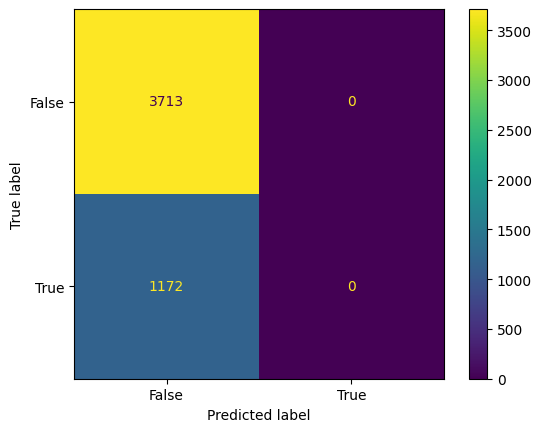

KeyboardInterrupt: 

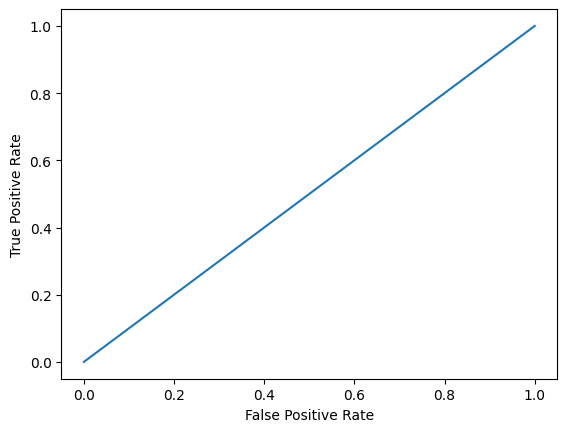

In [ ]:
csm_list = []
for (i,j) in [(5,3), (7,3), (9,3), (7,5), (9,7)]:
    csm_list.append(CentroidSMOTE(k_neighbors=i, m_vertices=j))

for csm in csm_list:
    X_new, y_new = csm.fit_resample(X_train, y_train)
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)